# Random Forest Model

## Step 1: Import packages and set working directory

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import optuna

In [2]:
# Optional Code: Here's a format for setting working directory, change as needed
import os
# os.chdir('/path/to/the/project')
os.chdir('/Users/zihanji/Desktop/DS340W')

## Step 2: Load the final cleaned data

In [3]:
data_final = pd.read_csv('./project/volume/data/processed/data_final.csv')

## Step 3: Building the random forest model

In [4]:
# Split the data to features and result
x = data_final.drop('SalePrice', axis = 1)
y = data_final['SalePrice']

In [5]:
# Split the data to train and test, with test size being 20% of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
# Fit the model to built a prediction for x test
random_forest = RandomForestRegressor(n_estimators = 200, max_depth = 8, max_features = 9)
random_forest.fit(x_train, y_train)
random_forest_pred = random_forest.predict(x_test)

## Step 4: Check for scores

In [7]:
# Check for the score of the prediction
random_forest_score = random_forest.score(x_train, y_train)
print('Random Forest Regression Model Score: ', round(random_forest_score, 3))

# R squared value
r2 = r2_score(y_test, random_forest_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, random_forest_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, random_forest_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(random_forest, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

Random Forest Regression Model Score:  0.88
R Squared:  0.865
Adjusted R Squared:  0.852
Mean Squared Error:  0.025
Root Mean Squared Error:  0.158
Mean Absolute Error:  0.112
Accuracy:  82.409 %


## Step 5: Create visuals

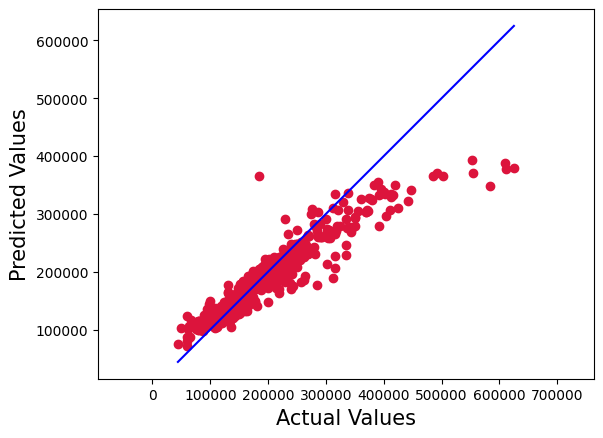

In [8]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(random_forest_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

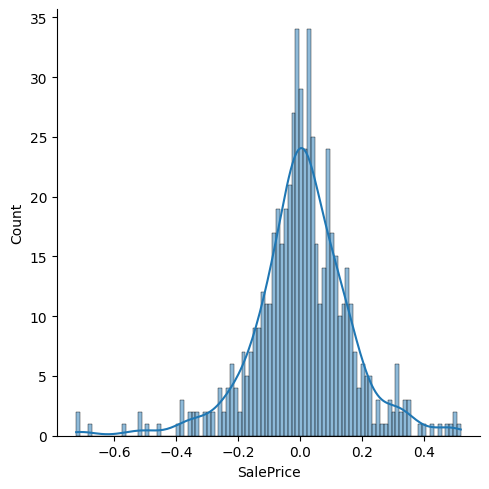

In [9]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - random_forest_pred), bins = 100, kde = True)

## Step 6: Hyperparameter tuning (grid search)

In [10]:
# Specifies hyperparameter options
parameters = {'n_estimators': [100, 300, 500], 'max_depth': [2, 6, 10], 'max_features': [1, 5, 9]}

In [11]:
# Apply grid search to find the best hyperparameter option
GS_CV_rf = GridSearchCV(estimator = random_forest, param_grid = parameters, cv = 5)
GS_CV_rf.fit(x_train, y_train)
GS_CV_rf.best_params_

{'max_depth': 10, 'max_features': 9, 'n_estimators': 500}

In [12]:
# Built a random forest model with the new hyperparameter option
# {'max_depth': 10, 'max_features': 9, 'n_estimators': 100}
random_forest_mod = RandomForestRegressor(n_estimators = 100, max_depth = 10, max_features = 9)
random_forest_mod.fit(x_train, y_train)
random_forest_pred = random_forest_mod.predict(x_test)

## Step 7: Check for scores

In [13]:
# Check for the score of the prediction
random_forest_mod_score = random_forest_mod.score(x_train, y_train)
print('Random Forest Regression Model Score: ', round(random_forest_mod_score, 3))

# R squared value
r2 = r2_score(y_test, random_forest_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, random_forest_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, random_forest_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(random_forest_mod, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

Random Forest Regression Model Score:  0.921
R Squared:  0.882
Adjusted R Squared:  0.87
Mean Squared Error:  0.022
Root Mean Squared Error:  0.148
Mean Absolute Error:  0.103
Accuracy:  84.186 %


## Step 8: Create visuals

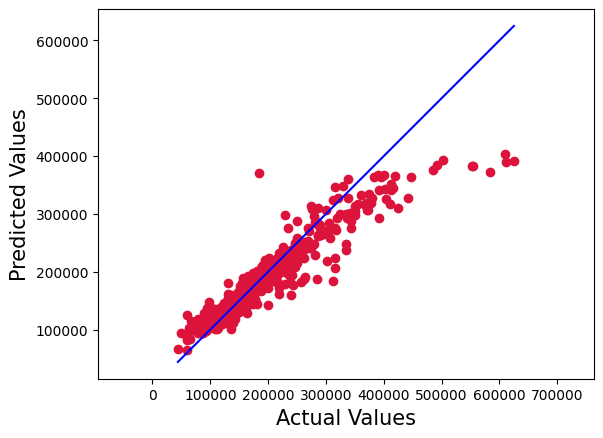

In [14]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(random_forest_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

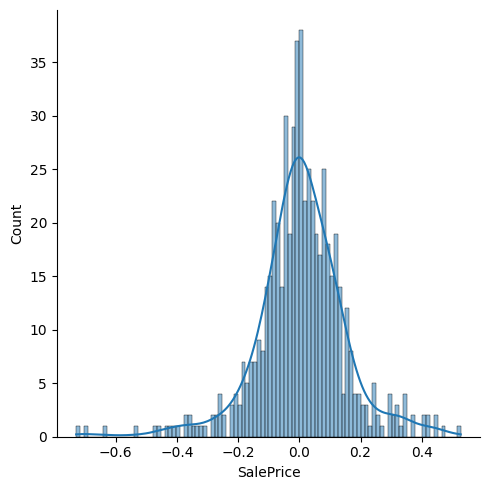

In [15]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - random_forest_pred), bins = 100, kde = True)

## Step 9: Hyperparameter tuning (optuna, with the same hyperparamter space as grid search)

In [16]:
def objective(trial):
    # Define hyperparameter search space
    parameters = {'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                  'max_depth': trial.suggest_int('max_depth', 2, 10),
                  'max_features': trial.suggest_int('max_features', 1 , 9)}
    # Train random forest model
    model = RandomForestRegressor(**parameters, n_jobs = -1, random_state = 42)
    model.fit(x_train, y_train)
    # Evaluate model
    preds = model.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    return rmse

In [17]:
# Run optuna optimization
study = optuna.create_study(direction = 'minimize') # Minimize RMSE
study.optimize(objective, n_trials = 50)

# Print best hyperparameters
print('Best RMSE: ', study.best_value)
print('Best Hyperparameters: ', study.best_params)

[I 2025-04-06 16:30:46,719] A new study created in memory with name: no-name-4ab246c0-4514-4f3c-9785-e412d9013229
[I 2025-04-06 16:30:47,348] Trial 0 finished with value: 0.24267045513383734 and parameters: {'n_estimators': 454, 'max_depth': 8, 'max_features': 2}. Best is trial 0 with value: 0.24267045513383734.
[I 2025-04-06 16:30:48,616] Trial 1 finished with value: 0.15641699360642045 and parameters: {'n_estimators': 468, 'max_depth': 8, 'max_features': 9}. Best is trial 1 with value: 0.15641699360642045.
[I 2025-04-06 16:30:48,891] Trial 2 finished with value: 0.17963186223755606 and parameters: {'n_estimators': 169, 'max_depth': 6, 'max_features': 9}. Best is trial 1 with value: 0.15641699360642045.
[I 2025-04-06 16:30:49,178] Trial 3 finished with value: 0.17286578613567294 and parameters: {'n_estimators': 141, 'max_depth': 7, 'max_features': 8}. Best is trial 1 with value: 0.15641699360642045.
[I 2025-04-06 16:30:49,578] Trial 4 finished with value: 0.20040521109741594 and param

Best RMSE:  0.14610236380222938
Best Hyperparameters:  {'n_estimators': 438, 'max_depth': 10, 'max_features': 9}


In [18]:
# Built a random forest model with the new hyperparameter option
# {'n_estimators': 438, 'max_depth': 10, 'max_features': 9}
rf_mod = RandomForestRegressor(n_estimators = 438, max_depth = 10, max_features = 9)
rf_mod.fit(x_train, y_train)
random_forest_pred = rf_mod.predict(x_test)

## Step 10: Check for scores

In [19]:
# Check for the score of the prediction
rf_mod_score = rf_mod.score(x_train, y_train)
print('Random Forest Regression Model Score: ', round(rf_mod_score, 3))

# R squared value
r2 = r2_score(y_test, random_forest_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, random_forest_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, random_forest_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(rf_mod, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

Random Forest Regression Model Score:  0.922
R Squared:  0.887
Adjusted R Squared:  0.876
Mean Squared Error:  0.021
Root Mean Squared Error:  0.144
Mean Absolute Error:  0.101
Accuracy:  84.457 %


## Step 11: Create visuals

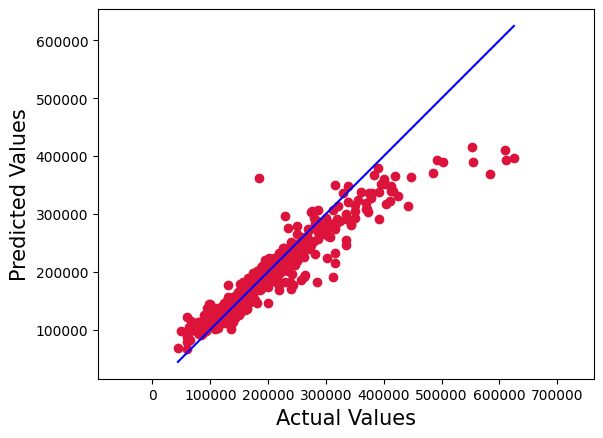

In [20]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(random_forest_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

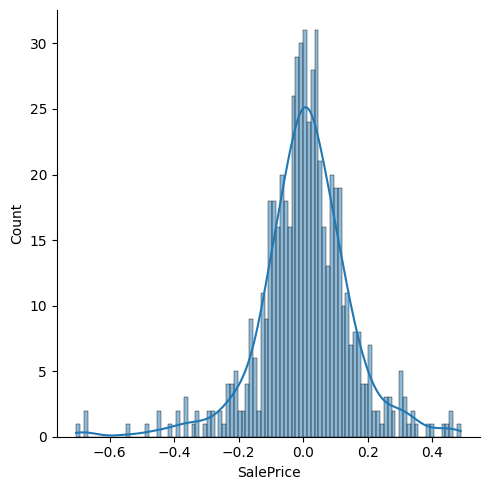

In [21]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - random_forest_pred), bins = 100, kde = True)

## Step 12: Hyperparameter tuning (optuna, with bigger hyperparamter space)

In [22]:
def objective(trial):
    # Define hyperparameter search space
    parameters = {'n_estimators': trial.suggest_int('n_estimators', 1, 600),
                  'max_depth': trial.suggest_int('max_depth', 1, 20),
                  'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
                  'max_features': trial.suggest_int('max_features', 1 , 20)}
    # Train random forest model
    model = RandomForestRegressor(**parameters, n_jobs = -1, random_state = 42)
    model.fit(x_train, y_train)
    # Evaluate model
    preds = model.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    return rmse

In [23]:
# Run optuna optimization
study = optuna.create_study(direction = 'minimize')  # Minimize RMSE
study.optimize(objective, n_trials = 50)

# Print best hyperparameters
print('Best RMSE: ', study.best_value)
print('Best Hyperparameters: ', study.best_params)

[I 2025-04-06 16:32:43,406] A new study created in memory with name: no-name-32efead4-bee5-4851-a9b8-ed57c227fd58
[I 2025-04-06 16:32:44,163] Trial 0 finished with value: 0.14782762494252646 and parameters: {'n_estimators': 559, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': 17}. Best is trial 0 with value: 0.14782762494252646.
[I 2025-04-06 16:32:44,780] Trial 1 finished with value: 0.37595116202764306 and parameters: {'n_estimators': 550, 'max_depth': 1, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_features': 4}. Best is trial 0 with value: 0.14782762494252646.
[I 2025-04-06 16:32:45,838] Trial 2 finished with value: 0.26946066542690983 and parameters: {'n_estimators': 520, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 15, 'max_features': 6}. Best is trial 0 with value: 0.14782762494252646.
[I 2025-04-06 16:32:45,982] Trial 3 finished with value: 0.18575329079754765 and parameters: {'n_estimators': 21, 'max_depth': 6, 'min_sam

Best RMSE:  0.12699123352623676
Best Hyperparameters:  {'n_estimators': 370, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 16}


In [24]:
# Built a random forest model with the new hyperparameter option
# {'n_estimators': 370, 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_features': 16}
rfr_mod = RandomForestRegressor(n_estimators = 370, max_depth = 19, min_samples_split = 19, min_samples_leaf = 1,
                                max_features = 16)
rfr_mod.fit(x_train, y_train)
random_forest_pred = rfr_mod.predict(x_test)

## Step 13: Check for scores

In [25]:
# Check for the score of the prediction
rfr_mod_score = rfr_mod.score(x_train, y_train)
print('Random Forest Regression Model Score: ', round(rfr_mod_score, 3))

# R squared value
r2 = r2_score(y_test, random_forest_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, random_forest_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, random_forest_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(rfr_mod, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

Random Forest Regression Model Score:  0.923
R Squared:  0.906
Adjusted R Squared:  0.897
Mean Squared Error:  0.017
Root Mean Squared Error:  0.132
Mean Absolute Error:  0.09
Accuracy:  86.631 %


## Step 14: Create visuals

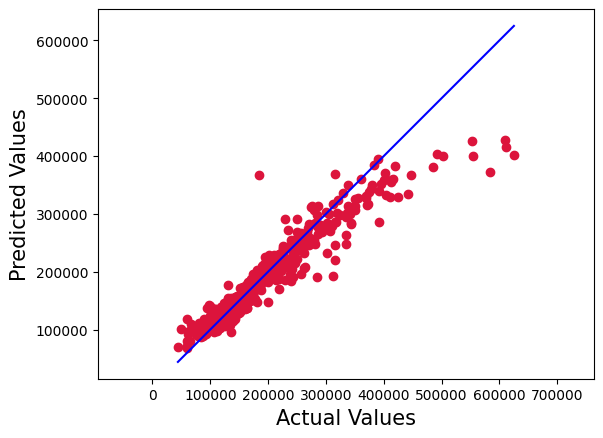

In [26]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(random_forest_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

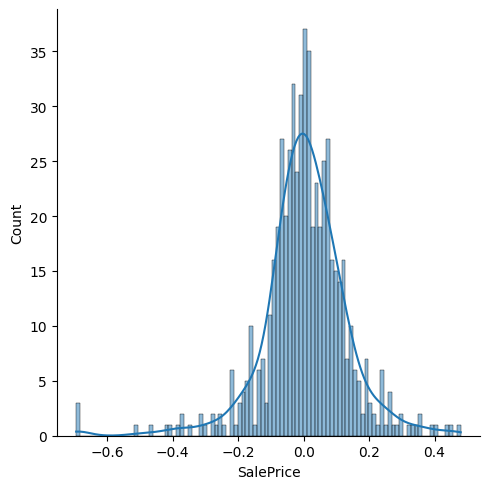

In [27]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - random_forest_pred), bins = 100, kde = True)